In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ds = pd.read_csv('ds_salaries.csv')

In [9]:
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
ds.shape

(607, 12)

In [11]:
ds.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [14]:
ds.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [15]:
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# we can see that there's no missing values in columns

In [65]:
np.mean(ds['salary'])

324000.0626029654

In [66]:
np.std(ds['salary'])

1543084.8391295238

In [67]:
np.percentile(ds['salary'], [25, 50, 75])

array([ 70000., 115000., 165000.])

In [68]:
np.unique(ds['experience_level'])

array(['EN', 'EX', 'MI', 'SE'], dtype=object)

In [60]:
ds[ds['salary'] > 60000]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [62]:
numeric_columns = ds.select_dtypes(include='number').columns
ds.groupby('experience_level')[numeric_columns].mean()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,,
EN,218.181818,2021.011364,264622.454545,61643.318182,69.886364
EX,258.346154,2021.423077,427072.115385,199392.038462,78.846154
MI,269.666667,2021.276995,480617.690141,87996.056338,63.849765
SE,359.160714,2021.625000,213949.353571,138617.292857,75.892857


In [64]:
numeric_columns = ds.select_dtypes(include='number').columns
ds[numeric_columns].corr()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


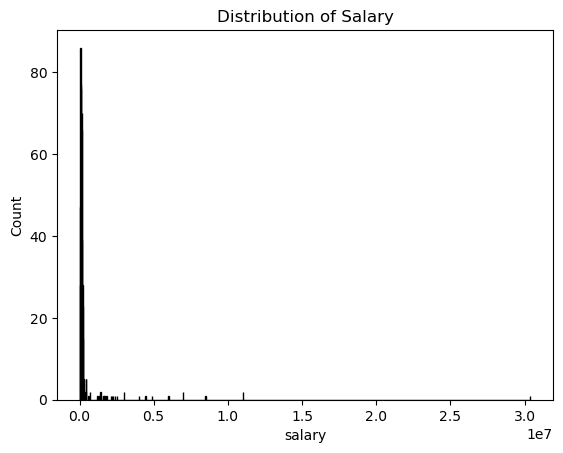

In [47]:
sns.histplot(ds['salary'], kde=False, color='red', edgecolor="k", linewidth=1)
plt.title('Distribution of Salary')
plt.show()

In [55]:
#The histogram illustrates the distribution of salaries in the dataset. 
#Looking at the chart, we can see that the majority of salaries are clustered within a specific range
#with a peak around the middle of the salary range. However,
#there are only a few individuals earning significantly higher salaries, as indicated by the smaller frequencies beyond this range. 
#This suggests that while most individuals in the dataset earn salaries within a certain range, there are a few outliers with exceptionally high earnings.

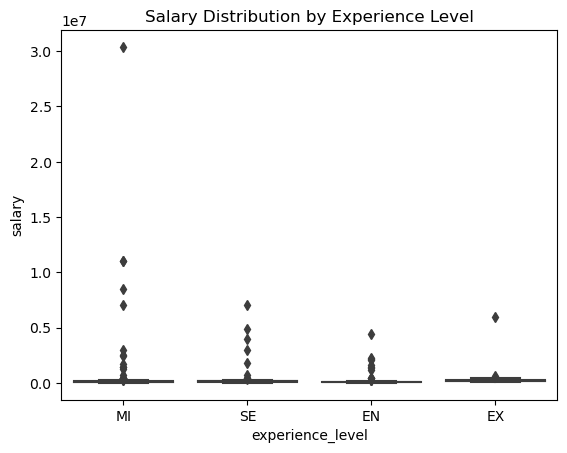

In [48]:
sns.boxplot(data=ds, x="experience_level", y="salary")
plt.title('Salary Distribution by Experience Level')
plt.show()

In [ ]:
#The box plot visualizes the distribution of salaries across different experience levels in the dataset.
#Each box represents the salary distribution within a specific experience level category. 
#From the plot, we observe variations in salary distribution across different experience levels. 
#Generally, individuals with higher experience levels tend to have higher median salaries, 
#as indicated by the higher position of the boxplots. However, there is variability within each experience level category, 
#with some outliers indicating individuals earning exceptionally high salaries relative to their experience level.

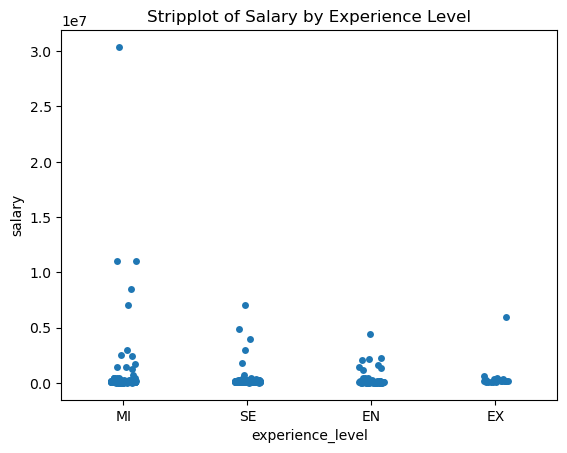

In [49]:
sns.stripplot(data=ds, x="experience_level", y="salary")
plt.title('Stripplot of Salary by Experience Level')
plt.show()

In [56]:
#The strip plot displays the relationship between salary and experience level in the dataset. 
#Each point on the plot represents an individual's salary and corresponding experience level. 
#From the plot, we observe a general trend where individuals with higher experience levels tend to have higher salaries. 
#However, there is considerable variability within each experience level category, 
#with some individuals earning significantly higher or lower salaries compared to others. 
#This indicates that while experience level may influence salary, other factors may also play a role in determining individual salaries.

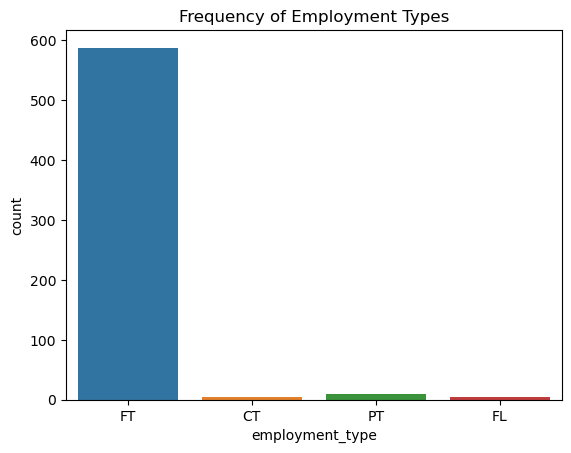

In [50]:
sns.countplot(data=ds, x="employment_type")
plt.title('Frequency of Employment Types')
plt.show()

In [ ]:
#The count plot illustrates the frequency of different employment types in the dataset. 
#Each bar on the plot represents the number of individuals belonging to a specific employment type category. 
#From the plot, we observe that the most common employment type in the dataset is likely to be represented by the tallest bar, indicating the highest frequency. 
#Additionally, we can compare the frequencies of different employment types to understand the distribution of employment types among individuals in the dataset.

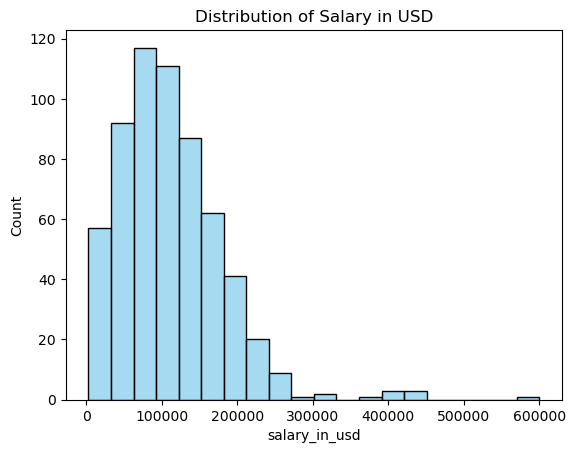

In [51]:
sns.histplot(ds['salary_in_usd'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary in USD')
plt.show()

In [ ]:
#The histogram visualizes the distribution of salaries in USD within the dataset. 
#Each bar on the plot represents a salary range, and the height of the bar indicates the frequency of salaries falling within that range.
#From the plot, we can observe the overall distribution of salaries in USD, with the majority of salaries likely concentrated within certain ranges. 
#Additionally, we can identify any notable patterns or trends in the distribution of salaries in USD, 
#such as the presence of outliers or skewness in the data.

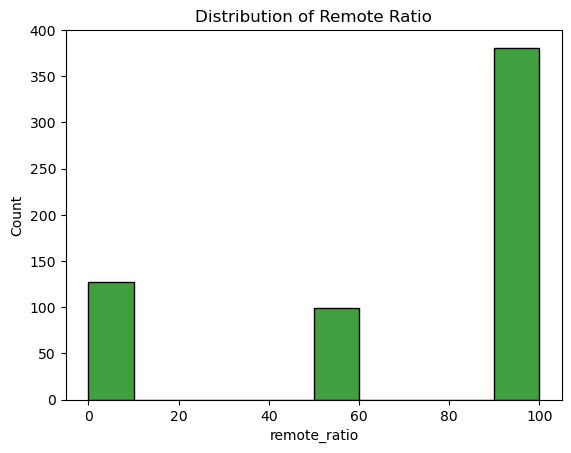

In [52]:
sns.histplot(ds['remote_ratio'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of Remote Ratio')
plt.show()

In [ ]:
#The histogram illustrates the distribution of remote ratio within the dataset. 
#Each bar on the plot represents a range of remote ratios,
#and the height of the bar indicates the frequency of observations falling within that range. 
#From the plot, we can observe the overall distribution of remote ratios,
#with the majority of observations likely concentrated within certain ranges. Additionally, 
#we can identify any notable patterns or trends in the distribution of remote ratios, 
#such as the presence of outliers or skewness in the data.

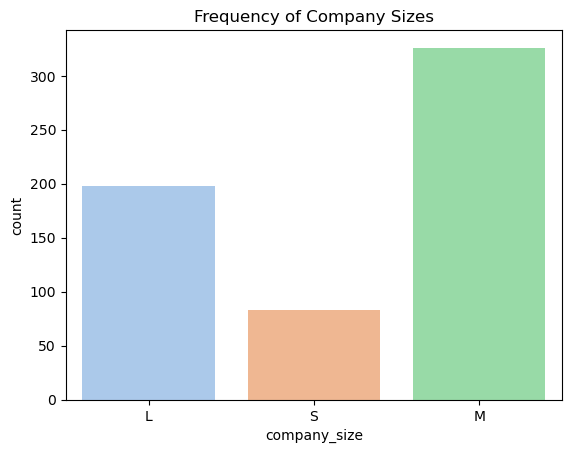

In [53]:
sns.countplot(x='company_size', data=ds, palette='pastel')
plt.title('Frequency of Company Sizes')
plt.show()

In [ ]:
#The count plot visualizes the frequency of different company sizes within the dataset. 
#Each bar on the plot represents a specific company size category,
#and the height of the bar indicates the number of observations belonging to that category. 
#From the plot, we can observe the distribution of company sizes among the observations in the dataset. 
#This allows us to identify the most common company sizes and compare their frequencies to understand the distribution of company sizes overall.